<a href="https://colab.research.google.com/github/syahrinalfi/MachineLearningTasks/blob/main/2ndWeekTasks/2_Linear_Regression_Salary_Data_Simple_SVR_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama : Muhammad Alfi Syahrin
* NIM : 1103213144
* Dataset : Salary_Data_Simple_SVR.csv

In [50]:
# 1.Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [51]:
# 2.Load Dataset
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Minggu 2/Salary_Data_Simple_SVR.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# 3.Informasi Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [53]:
# 4.Pemisahan Data
X = data.iloc[:, :-1].values  # Fitur
y = data.iloc[:, -1].values   # Target

In [54]:
# 5.Pembuatan Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
# 6.Evaluasi Model
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r_squared = r2_score(y_test, y_pred)

# Cetak hasil evaluasi
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)
print("R-squared:", r_squared)

RMSE: 7059.04362190151
MAE: 6286.453830757749
MAPE: 7.744880046205216
R-squared: 0.9024461774180497


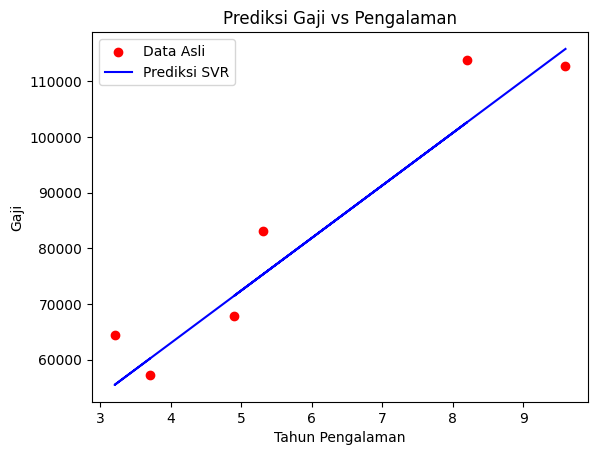

In [56]:
# 7.Visualisasi Hasil Prediksi
plt.scatter(X_test, y_test, color='red', label='Data Asli')
plt.plot(X_test, y_pred, color='blue', label='Prediksi SVR')
plt.title('Prediksi Gaji vs Pengalaman')
plt.xlabel('Tahun Pengalaman')
plt.ylabel('Gaji')
plt.legend()
plt.show()

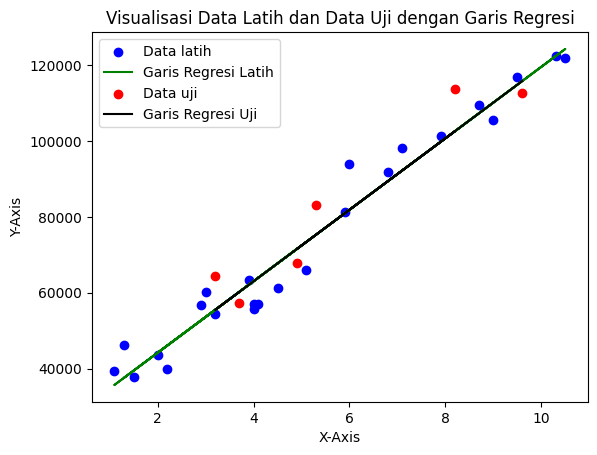

In [57]:
# 8.Visualisasi Hasil Prediksi Data Latih dan Data Uji
y_train_pred = model.predict(X_train)

# Visualisasi Data Latih
plt.scatter(X_train, y_train, color='blue', label='Data latih')
plt.plot(X_train, y_train_pred, color='green', label='Garis Regresi Latih')

# Visualisasi Data Uji
plt.scatter(X_test, y_test, color='red', label='Data uji')
plt.plot(X_test, y_pred, color='black', label='Garis Regresi Uji')

# Menambahkan judul dan label
plt.title('Visualisasi Data Latih dan Data Uji dengan Garis Regresi')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.legend()

# Menampilkan plot
plt.show()

In [58]:
# 9.Menampilkan nilai aktual dari data test dengan nilai prediksi dari model
df = pd.DataFrame({'YearsExperience': X_test.flatten(), 'ActualSalary': y_test, 'PredictedSalary': y_pred})

# Menampilkan DataFrame
print(df)

   YearsExperience  ActualSalary  PredictedSalary
0              9.6      112635.0    115790.210113
1              4.9       67938.0     71498.278095
2              8.2      113812.0    102596.868661
3              5.3       83088.0     75267.804224
4              3.2       64445.0     55477.792045
5              3.7       57189.0     60189.699707


In [59]:
# 10.Melakukan prediksi menggunakan data baru
new_data = [[5], [10], [15]]  # Data baru tahun pengalaman kerja
new_predictions = model.predict(new_data)

# Menampilkan hasil prediksi
print("Hasil Prediksi:")
for i, prediction in enumerate(new_predictions, 1):
    print(f"Data {i}: Tahun Pengalaman={new_data[i-1][0]}, Prediksi Gaji={prediction:.2f}")


Hasil Prediksi:
Data 1: Tahun Pengalaman=5, Prediksi Gaji=72440.66
Data 2: Tahun Pengalaman=10, Prediksi Gaji=119559.74
Data 3: Tahun Pengalaman=15, Prediksi Gaji=166678.81
